In [1]:
shape_cat=""
vol=""
z_range=""

In [2]:
# Parameters
shape_cat = "im3"
vol = "all"
z_range = "high_z"


In [3]:
#This header file contains all the common packages
%matplotlib inline
%run /home/cz136/project/sa/lib/src/header.py $shape_cat $vol $z_range 

In [4]:
print(len(clusters))
print(len(shapes))

4736
36654


In [5]:
# Print the numbers of galaxies that needed to be masked


print(np.sum(shapes[('All','e1')]==-9999))
print(np.sum(shapes[('All','e2')]==-9999))
print(np.sum(shapes['All','flags_select']==0))
print(np.sum(shapes[('All','PP')]<=0.55))

0
0
36654
0


In [6]:
#masking
print(len(clusters))
print(len(shapes))

4736
36654


# Stats of e1,e2

count    36654.000000
mean        -0.002214
std          0.239138
min         -0.949030
25%         -0.145750
50%         -0.001363
75%          0.141577
max          0.948471
Name: (All, e2), dtype: float64

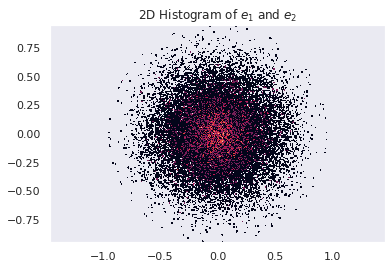

In [7]:
from matplotlib.colors import LogNorm 
plt.hist2d(shapes['All','e1'],shapes['All','e2'],bins=500,norm=LogNorm())
plt.axis('equal')
plt.title("2D Histogram of $e_1$ and $e_2$")
pd.Series(shapes['All','e1']).describe()
pd.Series(shapes['All','e2']).describe()

count    36654.000000
mean        -0.152936
std        159.140547
min     -13408.186536
25%         -1.013730
50%         -0.004646
75%          0.970095
max      20342.594678
dtype: float64

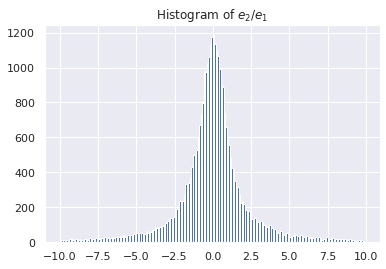

In [8]:
#statistics and hisgoram of e2/e1
plt.hist(shapes['All','e2']/shapes['All','e1'],bins=np.arange(-10,10,0.1))
plt.title("Histogram of $e_2$/$e_1$")
pd.Series(shapes['All','e2']/shapes['All','e1']).describe()

# Get phi 

In [9]:
def get_std_err_of_mean(np_array):
    mean=np_array.mean()
    std=np_array.std()
    n=len(np_array)
    return(std/np.sqrt(n))

In [10]:
phi_1d=shapes[('All','phi')]

## Stats for unweighted

In [11]:
pd.Series(phi_1d).describe()
print("Mean:{:05e} \nStdE:{:05e} ".format(phi_1d.mean(),phi_1d.std()/np.sqrt(len(phi_1d))))

Mean:4.540643e+01 
StdE:1.333901e-01 


count    36654.000000
mean        45.406428
std         25.537847
min          0.009509
25%         22.500000
50%         45.844896
75%         67.500000
max         89.995125
Name: (All, phi), dtype: float64

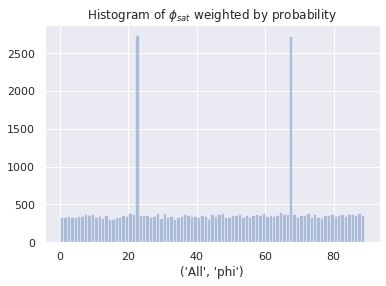

In [12]:
BINS=np.arange(0,90,1)
ax = sns.distplot(shapes[('All','phi')],bins=BINS,kde=False)
ax.set_title("Histogram of $\phi_{sat}$ weighted by probability") 
pd.Series(phi_1d).describe()

# Abnormal Analysis

In [13]:
np.sum((shapes[('All','phi')]>=22.4) &(shapes[('All','phi')]<=22.6)) 
abn_1 = shapes[(shapes[('All','phi')]>=22.4) &(shapes[('All','phi')]<=22.6)]
abn_2 = shapes[(shapes[('All','phi')]>67.4) &(shapes[('All','phi')]<=67.6)]

In [14]:
corr_1=abn_1.corr(method='pearson')[('All','phi')]
corr_2=abn_2.corr(method='pearson')[('All','phi')]

In [15]:
display(HTML((pd.concat([pd.DataFrame(corr_1),pd.DataFrame(corr_2)],axis=1)).to_html()))
# display(corr_2.to_html())

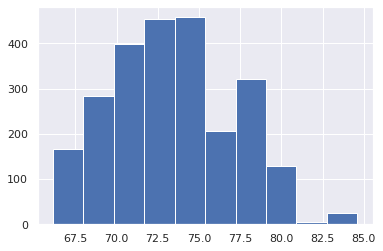

In [16]:
abn_1[('All','RA')].hist()
#RA of objects with ϕ=22.5

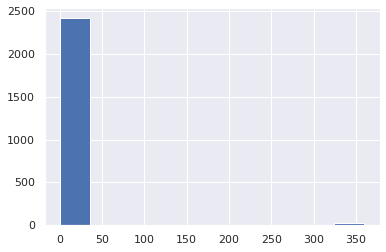

In [17]:
abn_2[('All','RA')].hist()
#RA of objects with ϕ=67.5

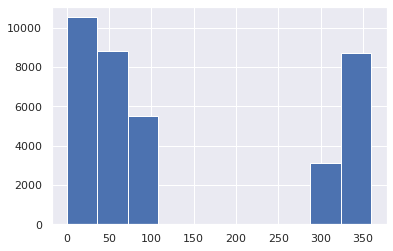

In [18]:
shapes[('All','RA')].hist()
#RA of all objects

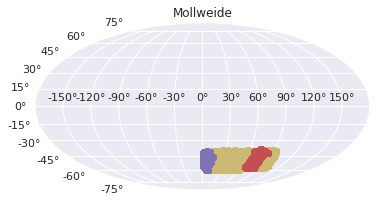

In [19]:
abn_1_Coor=SkyCoord(abn_1['All','RA'],abn_1['All','DEC'],unit=u.deg)
abn_2_Coor=SkyCoord(abn_2['All','RA'],abn_2['All','DEC'],unit=u.deg)
shape_Coor=SkyCoord(shapes['All','RA'],shapes['All','DEC'],unit=u.deg)


plt.figure()
plt.subplot(111, projection="mollweide")
plt.title("Mollweide")
plt.grid(True)
plt.scatter(shape_Coor.ra.radian, shape_Coor.dec.radian,color='y')
plt.scatter(abn_1_Coor.ra.radian, abn_1_Coor.dec.radian,color='r')
plt.scatter(abn_2_Coor.ra.radian, abn_2_Coor.dec.radian,color='m')
plt.show()

In [20]:
# np.save("/home/cz136/project/sa/data/im3_225_id.npy",abn_1.index.to_numpy())
# np.save("/home/cz136/project/sa/data/im3_675_id.npy",abn_2.index.to_numpy())
# np.save("/home/cz136/project/sa/data/im3_225_ra.npy",abn_1[('All','ra')].to_numpy())
# np.save("/home/cz136/project/sa/data/im3_225_dec.npy",abn_1[('All','dec')].to_numpy())
# np.save("/home/cz136/project/sa/data/im3_675_ra.npy",abn_2[('All','ra')].to_numpy())
# np.save("/home/cz136/project/sa/data/im3_675_dec.npy",abn_2[('All','dec')].to_numpy())

# Analysis around 22.5 and 67.5

In [21]:
#Print out the most crowded bins

phi_count=np.histogram(phi_1d,bins=BINS)
sort=np.argsort(-phi_count[0])
print(phi_count[1][sort])
print(phi_count[0][sort])

[22 67 64 59 47 28 20 72 87 30 84 66 21  7 68 57 46 65 74 52 79 36 82 44
  9 85 18 51 41 81 78 77 37 58 63 86 61 71 24 54 13  8 50 88 25 70 23 56
 83 11 38 27 32 42 62 45  5 35 60 19  2 39 80  6 55  4 31 26 16 53 10  0
  1 40 34 48 73 49 17 75 69  3 12 76 29 33 43 15 14]
[2739 2735  397  391  387  386  386  384  383  382  380  380  377  377
  376  376  375  374  372  371  371  369  369  368  368  368  367  366
  366  365  365  365  365  364  364  363  361  361  359  359  359  357
  356  356  356  355  355  355  354  354  354  354  350  348  348  347
  347  347  346  346  343  343  343  343  341  340  339  339  339  338
  338  337  336  336  336  335  334  334  333  333  333  330  323  320
  315  312  310  309  303]


count    2739.000000
mean       22.502121
std         0.105186
min        22.000872
25%        22.500000
50%        22.500000
75%        22.500000
max        22.999511
Name: (All, phi), dtype: float64

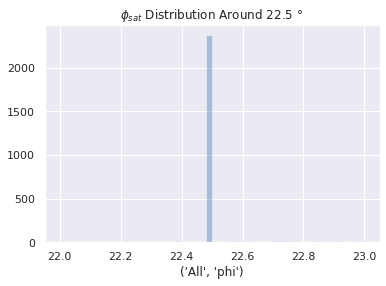

In [22]:
#Statistics around 22.5
first_cluster_left=np.sum(phi_count[0][0:22])
first_length=phi_count[0][sort][0]
first_cluster=phi_1d[first_cluster_left:first_cluster_left+first_length]
ax = sns.distplot(first_cluster,kde=False)
ax.set_title("$\phi_{sat}$ Distribution Around 22.5 $\degree$")
pd.Series(first_cluster).describe()

count    2739.000000
mean       67.501389
std         0.103777
min        67.000531
25%        67.500000
50%        67.500000
75%        67.500000
max        68.009021
Name: (All, phi), dtype: float64

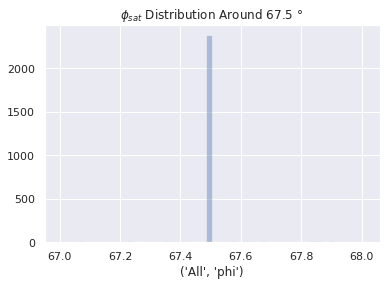

In [23]:
second_cluster_left=np.sum(phi_count[0][0:67])
second_length=phi_count[0][sort][0]
second_cluster=phi_1d[second_cluster_left:second_cluster_left+second_length]
ax = sns.distplot(second_cluster,kde=False)
ax.set_title("$\phi_{sat}$ Distribution Around 67.5 $\degree$")
pd.Series(second_cluster).describe()

# Get e

## Statistics of e1 and e2

In [24]:
e1=shapes[('All','e1')].to_numpy()
shapes[('All','e1')].describe()

count    36654.000000
mean         0.001075
std          0.239680
min         -0.949957
25%         -0.143281
50%          0.000721
75%          0.144744
max          0.949938
Name: (All, e1), dtype: float64

In [25]:
e2=shapes[('All','e1')].to_numpy()
shapes[('All','e2')].describe()

count    36654.000000
mean        -0.002214
std          0.239138
min         -0.949030
25%         -0.145750
50%         -0.001363
75%          0.141577
max          0.948471
Name: (All, e2), dtype: float64

In [26]:
# np.save("/home/cz136/project/sa/data/{}/e_array".format(dir_string),e_list)

In [27]:
e_p_1d=shapes[('All','ep')]
e_x_1d=shapes[('All','ex')]

mean=-5.280694e-03, std_mean=1.264335e-03


count    36654.000000
mean        -0.005281
std          0.242060
min         -0.949810
25%         -0.157990
50%         -0.001067
75%          0.145451
max          0.942589
Name: (All, ep), dtype: float64

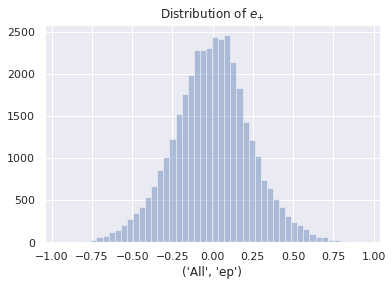

In [28]:
ax=sns.distplot(e_p_1d,kde=False)
ax.set_title("Distribution of $e_{+}$")
print ("mean={:05e}, std_mean={:05e}".format(e_p_1d.mean(),get_std_err_of_mean(e_p_1d)))
pd.Series(e_p_1d).describe()

mean=1.238182e-02, std_mean=1.234559e-03


count    36654.000000
mean         0.012382
std          0.236359
min         -0.949919
25%         -0.122935
50%          0.018294
75%          0.149377
max          0.948847
Name: (All, ex), dtype: float64

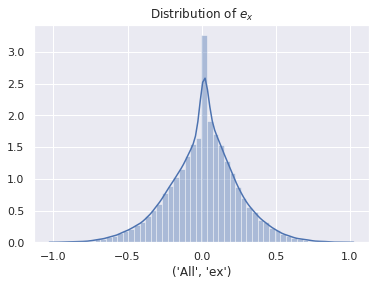

In [29]:
ax=sns.distplot(e_x_1d)
ax.set_title("Distribution of $e_{x}$")
print ("mean={:05e}, std_mean={:05e}".format(e_x_1d.mean(),get_std_err_of_mean(e_x_1d)))
pd.Series(e_x_1d).describe()